<a href="https://colab.research.google.com/github/jsh1021902/CUAI_BASIC/blob/main/Basic_%EC%A0%95%EC%84%9C%ED%98%84_2%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 사이킷런 소개와 특징

- **사이킷런** : 파이썬 기반의 머신러닝을 가장 쉽고 효율적인 개발 라이브러리 제공  

- **< 특징 >**
1. 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 **쉽고 가장 파이썬스러운 API**를 제공
2. 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 **편리한 프레임워크와 API**를 제공
3. **오랜 기간 실전 환경에서 검증**됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리

In [ ]:
pip install -U scikit-learn          # 사이킷런 최신 버전을 설치하려면, 아나콘다 Prompt를 열고 다음과 같이 pip를 이용해 설치하면 됨.

In [ ]:
import sklearn

print(sklearn.__version__)

1.2.2


# 2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

- 붓꽃 데이터 세트로 붓꽃의 품종을 **분류(Classification)**
- **붓꽃 데이터 세트** : 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 **꽃의 품종 예측**하기 위한 것

- **분류** : 대표적인 **지도학습(Supervised Learning)** 방법의 하나
- **지도학습** : **명확한 정답이 주어진 데이터**를 먼저 학습한 뒤 미지의 정답을 예측하는 방식  
- **학습 데이터 세트** : 학습을 위해 주어진 데이터 세트 
- **테스트 데이터 세트** : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

In [ ]:
from sklearn.datasets import load_iris                      # 붓꽃 데이터 세트를 생성 → load_iris()
from sklearn.tree import DecisionTreeClassifier             # ML 알고리즘 : 의사 결정 트리(Decision Tree) 알고리즘 → DecisionTreeClassifier 적용
from sklearn.model_selection import train_test_split        # 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는데 사용하는 함수 → train_test_split() 함수

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩 
iris = load_iris()

# iris.data : Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가짐 
iris_data = iris.data                                                               # 피처 : sepal length, petal length, petal width

# iris.target : 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가짐
iris_label = iris.target                                                            # 레이블(Label, 결정값) : 0(Setosa 품종), 1(versicolor 품종), 2(virginica 품종)

print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- **학습용 데이터와 테스트용 데이터를 분리**  
→ 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트 필요하기 때문
- train_test_split() : 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 분할

In [ ]:
# X_train : 학습용 피처 데이터 세트, X_test : 테스트용 피처 데이터 세트, y_train : 학습용 레이블 데이터 세트, y_test : 테스트용 레이블 데이터 세트
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,                      # iris_data : 피처 데이터 세트, iris_label : 레이블 데이터 세트
                                                    test_size=0.2, random_state=11)             # test_size : 전체 데이터 중 테스트 데이터 세트의 비율 (test_size = 0.2 : 전체 데이터 중 테스트 데이터 20%, 학습 데이터 80%로 데이터 분할)
                                                                                                # random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값 (지정하지 않으면, 수행할 때마다 다른 학습/테스트 용 데이터 생성)

- 데이터를 기반으로 의사 결정 트리를 이용해 **학습** 수행

In [ ]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)        # random_state = 11 : 동일한 학습/예측 결과를 출력하기 위한 용도

# 학습 수행 
dt_clf.fit(X_train, y_train)                            # 생성된 DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하여 학습 수행

DecisionTreeClassifier(random_state=11)

- 학습된 DecisionTreeClassifier 객체를 이용해 **예측** 수행
- 예측은 **반드시 학습 데이터가 아닌 다른 데이터 이용**해야 함 

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(X_test)           # DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면, 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

- 예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능 평가 = **정확도** 측정
- **정확도** : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표 → accuracy_score() 함수 사용

In [ ]:
from sklearn.metrics import accuracy_score      
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))             # accuracy_score()의 첫 번째 파라미터 : 실제 레이블 데이터 세트, 두 번째 파라미터 : 예측 레이블 데이터 세트

예측 정확도: 0.9333


- **분류 예측 과정**
1. **데이터 세트 분리** : 데이터를 학습 데이터와 테스트 데이터로 분리
2. **모델 학습** : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킴
3. **예측 수행** : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측
4. **평가** : 이렇게 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능을 평가

# 3. 사이킷런의 기반 프레임워크 익히기

## Estimator 이해 및 fit(), predict() 메서드

- **fit()** 메서드 : ML 모델 **학습**을 위한 메서드
- **predict()** 메서드 : 학습된 모델의 **예측**을 위한 메서드  
→ 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 **fit()**과 **predict()**만을 이용해 간단하게 학습과 예측 결과 반환

- **Classifier** : 분류 알고리즘을 구현한 클래스
- **Regressor** : 회귀 알고리즘을 구현한 클래스
- **Estimator** : Classifier와 Regressor를 합친 클래스  
※ **cross_val_score()**와 같은 evaluation 함수, **GridSearchCV**와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스일 때, Estimator를 인자로 받음


- **비지도학습**(차원 축소, 클러스터링, 피처 추출(Feature Extraction))인 클래스 : **fit()**과 **transform()** 적용
- 비지도학습과 피처 추출에서의 **fit()** 메서드 : 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 **사전 구조를 맞추는 작업**
- **transform()** 메서드 : 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 **실제작업 수행하기 위한** 메서드
- **fit_transform()** : fit()과 transform()을 하나로 결합한 메서드  
(※ fit()과 transform()을 별도로 호출할 필요를 줄여주지만, 사용에 주의 필요)

## 사이킷런의 주요 모듈

### 예제 데이터

- **sklearn.datasets** : 사이킷런에 내장되어 예제로 제공하는 데이터 세트

### 피처 처리

- **sklearn.preprocessing** : 데이터 전처리에 필요한 다양한 가공 기능 제공  
(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
- **sklearn.feature_selection** : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
- **sklearn.feature_extraction** : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용  
(Ex.텍스트 데이터에서 Count Vectorizer나 Tf-|d| Vectorizer 등을 생성하는 기능 제공)  
(텍스트 데이터의 피처 추출은 sklearn.feature_extraction.text 모듈에,  
이미지 데이터의 피처 추출은 sklearn.feature_extraction.image 모듈에 지원 API가 있음)

### 피처 처리 & 차원 축소

- **sklearn.decomposition** : 차원 축소와 관련한 알고리즘을 지원하는 모듈  
PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능을 수행할 수 있음

### 데이터 분리, 검증 & 파라미터 튜닝

- **sklearn.model_selection** : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치(Grid Search)로 최적 파라미터 추출 등의 API 제공

### 평가

- **sklearn.metrics** : 분류, 회귀, 클러스터링, 페어와이즈(Pairwise)에 대한 다양한 성능 측정 방법 제공  
Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공

### ML 알고리즘

- **sklearn.ensemble** : 앙상블 알고리즘 제공 (랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공)
- **sklearn.linear_model** : 주로 선형 회귀, 릿지(Ridge), 라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원  
또한 SGD(Stochastic Gradient Descent) 관련 알고리즘도 제공
- **sklearn.naive_bayes** : 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등)
- **sklearn.neighbors** : 최근접 이웃 알고리즘 제공 (K-NN 등)
- **sklearn.svm** : 서포트 벡터 머신 알고리즘 제공
- **sklearn.tree** : 의사 결정 트리 알고리즘 제공
- **sklearn.cluster** : 비지도 클러스터링 알고리즘 제공 (K-평균, 계층형, DBSCAN 등)

### 유틸리티

- **sklearn.pipeline** : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

## 내장된 예제 데이터 세트

### 분류나 회귀 연습용 예제 데이터   
(내장된 데이터 세트는 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트와 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터세트로 나뉨)

- **datasets.load_boston()** : 회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
- **datasets.load_breast_cancer()** : 분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
- **datasets.load_diabetes()** : 회귀 용도이며, 당뇨 데이터 세트
- **datasets.load_digits()** : 분류 용도이며, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
- **datasets.load_iris()** : 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트

- fetch 계열의 명령 : 데이터의 크기가 커서 패키지에 **처음부터 저장돼 있지 않고** 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터   
(최초 사용 시 인터넷에 연결돼 있지 않으면 사용할 수 없음)

- fetch_covtype() : 회귀 분석용 토지 조사 자료
- fetch_20newsgroups() : 뉴스 그룹 텍스트 자료
- fetch_olivetti_faces() : 얼굴 이미지 자료
- fetch_lfw_people() : 얼굴 이미지 자료
- fetch_lfw_pairs() : 얼굴 이미지 자료
- fetch_rcv1() : 로이터 뉴스 말뭉치
- fetch_mldata() : ML 웹사이트에서 다운로드

### 분류와 클러스링을 위한 표본 데이터 생성기

- datasets.make_classifications() : 분류를 위한 데이터 세트를 생성. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성
- datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 줌  
→ 표본 데이터 생성기는 이외에도 많이만, 위 2개로 대다수의 사례 적용 가능


### 분류나 회귀를 위한 예제 데이터의 구성

- **data** : 피처의 데이터 세트 가리킴 → 넘파이 배열(ndarray)타입
- **target** : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트 → 넘파이 배열(ndarray)타입
- **target_names** : 개별 레이블의 이름 나타냄 → 넘파이 배열 또는 파이썬 리스트(list)타입
- **feature_names** : 피처의 이름 나타냄 → 넘파이 배열 또는 파이썬 리스트(list)
- **DESCR** : 데이터 세트에 대한 설명과 각 피처의 설명을 나타냄 → 스트링 타입



- **Bunch 클래스** : 파이썬 딕셔너리 자료형과 유사

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()                     # 붓꽃 데이터 세트 생성
print(type(iris_data))                      # load_iris() API의.반환 결과 : sklearn.utils.Bunch 클래스

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
keys = iris_data.keys()                     # load_iris() 데이터 세트의 Key 값
print('붓꽃 데이터 세트의 키들:', keys)           # 'data', 'target_names', 'feature_names' : 주요한 key 값

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- **데이터 키** : 피처들의 데이터 값   
- 데이터 세트가 **딕셔너리** 형태 → "데이터 세트.data" or "데이터 세트['data']"를 이용 

In [ ]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)                                      # feature_names의 key가 가리키는 데이터 값 추출

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)                                       # target_names의 key가 가리키는 데이터 값 추출

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])                                            # data의 key가 가리키는 데이터 값 추출

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)                                             # target의 key가 가리키는 데이터 값 추출


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

# 4. Model Selection 모듈 소개

## 학습/테스트 데이터 세트 분리 - train_test_split()

- 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측했을 때 생기는 문제

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


- 예측 결과가 100% 정확한 이유 : **이미 학습한 학습 데이터 세트를 기반**으로 예측했기 때문  
→ 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 **전용의 테스트 데이터 세트**이어야 함.

- **train_test_split()** : 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 분리  
(첫 번째 파라미터 : 피처 데이터 세트, 두 번째 파라미터 : 레이블 데이터 세트)
  
- 선택적인 파라미터
1. **test_size** : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정 (Default : 0.25. 즉 25%)
2. **train_size** : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정  
(통상적으로 test_size parameter를 사용하기 때문에 잘 사용되지 않음)
3. **shuffle** : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정 (Default : True)  
→ 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용됨
4. **random_state** :  호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값  
→ train_test_spit( )는 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 생성
  
- train_test_split()의 반환값 : **튜플** 형태  
→ 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트 테스트용 데이터의 레이블 데이터 세트가 반환

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,           # train_test_split()를 이용해 테스트 데이터 세트를 전체의 30%로, 학습 데이터를 70%로 분리
                                                    test_size=0.3, random_state=121)

In [4]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)                                                       # 학습 데이터를 기반으로 DecisionTreeClassifier를 학습하고 이 모델을 이용해 예측 정확도 측정
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))                   # 테스트 데이터로 예측 수행한 결과 정확도 : 약 95.56%

예측 정확도: 0.9556


## 교차 검증

- **과적합(Overfitting)** : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것  
→ 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면, 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 됨  
→ 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용
데이터가 들어올 경우에는 성능이 저하됨  
→ 이러한 문제점을 개선하기 위해 **교차 검증** 이용

- **교차 검증** : 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것  
→ 테스트 데이터 세트 외에 **별도의 검증 데이터 세트**를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용

### K 폴드 교차 검증

- **K 폴드 교차 검증** : K개의 데이터 폴드 세트를 만들어 **K번**만큼 **각 폴드 세트에 학습과 검증 평가를 반복적으로 수행**하는 방법

In [5]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


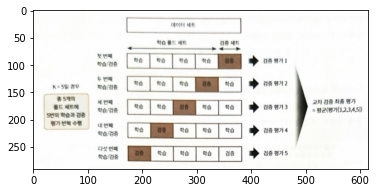

In [9]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/kfold.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                            # 읽어온 이미지 표시
plt.show()

- 다음 그림은 5 폴드 교차 검증을 수행(즉, K가 5).   
5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가
- **교차 검증 방법**
1. 데이터 세트 **K등분**
2. **첫 번째 반복**에서는 **처음부터 (K-1)등분까지**를 **학습 데이터 세트**, **마지막 K번째 등분** 하나를 **검증 데이터 세트**로 설정하고 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가 수행
3. **두 번째 반복**에서는 **처음부터 (K-2)등분까지**과 **K번째 등분**을 **학습 데이터 세트**로, **(K-1)번째 등분** 하나를 **검증 데이터 세트**로 설정하고 학습과 평가 작업 수행 
4. 점진적으로 학습과 검증 수행
5. K개의 예측 평가 구했으면, 이를 평균해서 K 폴드 평가 결과로 반영

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)                                                               #  KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])                                       # 전체 붓꽃 데이터 : 150개 → 학습용 데이터 세트 : 4/5인 120개, 검증 테스트 데이터 세트 : 1/5인 30개

붓꽃 데이터 세트 크기: 150


In [13]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'          # 교차 검증 시마다 검증 세트의 인덱스 달라짐
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))                                           # 5번 교차 검증 결과 평균 검증 정확도 : 0.9


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


### Stratified K 폴드

- **Stratified K 폴드** : **불균형한(imbalance)** 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 방법  
→ K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제 해결  
→ 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 **분포와 동일하게** 학습과 검증 데이터 세트를 분배
- **불균형한 분포도를 가진 레이블 데이터 집합** : 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것

In [14]:
import pandas as pd

iris = load_iris()                                                      # 붓꽃 데이터 세트를 간단하게 DataFrame으로 생성

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 레이블 값의 분포도를 확인
iris_df['label']=iris.target                                            # 레이블 값 : 0, 1, 2 값 모두 50개
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [15]:
kfold = KFold(n_splits=3)                                                   # 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성

# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출됨  
→ 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 됨  
(첫 번째 교차 검증에서 학습 레이블은 1, 2밖에 없으므로 0의 경우 학습 불가능, 검증 레이블 역시 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못함)   
→ KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결
- **StratifiedKFold 사용 방법** : 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 **split()** 메서드에 인자로 피처 데이터 세트뿐만 아니라 **레이블 데이터 세트도 반드시 필요함**

In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)                                           # 폴드 세트를 3개로 설정
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):        # 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됨 → 0, 1, 2 모두 학습 가능, 이에 기반한 검증 수행 가능
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [18]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))                            # 3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도 : 약 96.67%


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


- **분류**에서의 교차 검증 : Stratified K 폴드로 분할
- **회귀**에서의 교차 검증 : Stratified K 폴드가 지원되지 않음  
(∵ 회귀의 결정값이 이산값 형태의 레이블이 아닌 연속된 숫자값이므로 결정값별로 분포를 정하는 의미가 없음)

### cross_val_score()

- **cross_val_score()** : 교차 검증을 보다 간편하게 수행할 수 있게 해주는 API  
→ KFold의 반복적인 학습과 예측 수행하고 예측 성능을 반환하는 일련의 과정을 한꺼번에 수행해주는 API
- **선언 형태** : cross_val_score(**estimator**, **X**, **y=None**, **scoring=None**, **cv=None**, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

- **estimator** : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미
- **X** : 피처 데이터 세트
- **y** : 레이블 데이터 세트
- **scoring** : 예측 성능 평가 지표를 기술
- **cv** : 교차 검증 폴드 수
  
→  cross_val_score() 수행 후 **반환 값** : **scoring 파라미터로 지정된 성능 지표 측정값**을 배열 형태로 반환
  
※ **classifier가 입력되면**, **Stratified K 폴드** 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할  
※ **회귀인 경우**는 Stratified K 폴드 방식으로 분할할 수 없으므로 **K 폴드** 방식으로 분할

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)       # cross_val_score( )는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환 → 이를 평균해 평가 수치로 사용
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))                        # StratifiedKFold의 수행 결과와 비교했을 때, 각 교차 검증별 정확도와 평균 검증 정확도가 모두 동일함 = 내부적으로 StratifiedKFold를 이용하기 때문

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- **cross_validate()** : 여러 개의 평가 지표를 반환 가능 (cross_val_score()는 단 하나의 평가 지표만 가능)  
& 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공

## GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- **하이퍼 파라미터** : 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있음
- **GridSearchCV** : Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안 제공  
→ Grid는 격자라는 뜻으로, **촘촘하게 파라미터를 입력하면서 테스트를 하는 방식**  
→ 교차 검증을 기반으로 이 **하이퍼 파라미터의 최적 값을 찾게 해줌**  
(데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해줌)

In [ ]:
grid_parameters = {'max_depth': [1, 2, 3],                  # 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행
                   'min_samples_split': [2, 3]
                  }
# 순차적으로 6회에 걸쳐 하이퍼 파라미터를 변경하면서 교차 검증 데이터 세트에 수행 성능 측정 → CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균값으로 성능 측정
# 6개의 파라미터 조합이라면 총 CV 3회 X 6개 파라미터 조합 = 18회의 학습/평가 이뤄짐

### GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터

- **estimator** : classitier, regressor, pipeline이 사용될 수 있음
- **param_grid** : **key + 리스트 값**을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
- **scoring** : 예측 성능을 측정할 평가 방법을 지정  
보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예: 정확도의 경우 'accuracy)로 지정하나 별도의 성능 평가지표 함수도 지정할 수 있음
- **cv** : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
- **refit** :  디폴트가 True이며, True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,       # train_test_split()을 이용해 학습 데이터와 테스트 데이터를 먼저 분리
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}                               

In [22]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',                          # 총 6개의 결과 → 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 의미
           'split0_test_score', 'split1_test_score', 'split2_test_score']]          # 

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- '**params**' 컬럼 : 수행할 때마다 적용된 개별 하이퍼 파라미터값
- '**rank_test_score**' 컬럼 : 하이퍼 파라미터별로 성능이 좋은 score 순위  
→  1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터
- '**mean_test_score**' 컬럼 : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [23]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)                       # GridSearchCV 객체의 fit()을 수행하면, 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과값이 각각 best_params, best_score 속성에 기록됨
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))           # max_depth가 3, min_samples_split 2일 때, 검증용 폴드 세트에서 평균 최고 정확도가 97.50%로 측정됨

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [24]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_                                              #  refit=True이면, GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))     # 별도의 테스트 데이터 세트로 정확도를 측정한 결과 : 약 96.67%

테스트 데이터 세트 정확도: 0.9667


※  **일반적인 머신러닝 모델 적용 방법** : 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것 

# 5. 데이터 전처리

※ **결손값**, 즉 NaN, Null 값은 **허용되지 않으므로** 이러한 Null 값은 고정된 다른 값으로 변환해야 함
- 피처 값 중 Null값이 얼마 되지 않는 경우 : 피처의 평균값 등으로 간단히 대체 가능
- Null값이 대부분인 경우 : 해당 피처 드롭  
- **Null값이 일정 수준 이상 되는 경우** : 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우, 예측 왜곡이 심할 수 있다면 업무 로직 등을 상세히 검토해 **더 정밀한 대체 값을 선정해야 함**


※ **문자열 값**을 입력값으로 허용하지 않음 → 모든 문자열 값은 인코딩돼서 **숫자형으로 변환해야함**
  
- **문자열 피처**
1. **카테고리형 피처**
2. **텍스트형 피처** : 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는 것이 더 좋음  
→ **식별자 피처** : 단순히 데이터 로우를 식별하는 용도로 사용되므로 예측에 중요한 요소가 될 수 없으며 알고리즘을 복잡하게 만들고 예측 성능을 떨어뜨리기 때문

## 데이터 인코딩

### 레이블 인코딩 (Label encoding)

- **레이블 인코딩** : 카테고리 피처를 코드형 숫자 값으로 변환하는 것  
('01', '02'와 같은 **코드 값** 역시 문자열이므로 1, 2와 같은 **숫자형 값으로 변환돼야 함**)  
  
→ **LabelEncoder** 클래스로 구현 (LabelEncoder를 객체로 생성한 후, fit()과 transform()을 호출해 레이블 인코딩 수행)

In [25]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)                                                                  # 데이터가 작아서 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 있지만, 많은 경우에는 알지 못함 → LabelEncoder 객체의 classes_ 속성값으로 확인
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [26]:
print('인코딩 클래스:',encoder.classes_)        # classes_ 속성 : 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가짐

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [27]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))        # inverse_transform()을 통해 인코딩된 값을 다시 디코딩 가능

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- **레이블 인코딩이 일괄적인 숫자 값으로 변환되면서** 몇몇 ML 알고리즘에는 이를 적용할 경우 **예측 성능이 떨어지는 경우가 발생할 수 있음**  
(숫자 값의 경우, **크고 작음에 대한 특성**이 작용하기 때문)  
→ 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성 존재  
(**변환값**은 **단순 코드**이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안됨)  
→ **레이블 인코딩**은 **선형 회귀**와 같은 ML 알고리즘에는 **적용하지 않아야 함**

### 원-핫 인코딩(One-Hot encoding)

- **원-핫 인코딩** : 피처 값의 유형에 따라 새로운 피처를 추가해 **고유 값에 해당하는 컬럼에만 1을 표시**하고 **나머지 컬럼에는 0을 표시**하는 방식  
→ 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시  
(**원-핫** : 여러 개의 속성 중 **단 한 개의 속성만 1로 표시**)  
→ 레이블 인코딩의 문제점 해결하기 위한 인코딩 방식
  
→ **OneHotEncoder** 클래스로 구현 : **입력값**으로 **2차원 데이터**가 필요, OneHotEncoder 이용해 **변환한 값**이 **희소 행렬(Sparse Matrix)** 형태이므로 **toarray()** 메서드를 이용해 **밀집행렬(Dense Matrix)로 변환해야 함**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)              # 8개의 레코드와 1개의 컬럼을 가진 원본 데이터가 8개의 레코드와 6개의 컬럼을 가진 데이터로 변환됨

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()                        # 원본 데이터의 첫 번째 레코드가 TV이므로 변환된 데이터의 첫 번째 레코드의 첫 번째 컬럼이 1이고, 나머지 컬럼은 모두 0이 됨
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

- **get_dummies()** : 판다스에 있는 원-핫 인코딩을 더 쉽게 지원하는 API  
→ 사이킷런의 OneHotEncoder와 다르게 **문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환 가능**

In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })          # get_dummies( )를 이용하면 숫자 형 값으로 변환 없이도 바로 변환이 가능함
pd.get_dummies(df)

## 피처 스케일링과 정규화

- **피처 스케일링(feature scaling)** : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 대표적인 방법 : **표준화(Standardization)**, **정규화(Normalization)**

- **표준화** : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것  
→ 변환될 피처 x의 새로운 i번째 데이터 : **xi_new** = 원래 값에서 피치 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값

- **정규화** : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념  
(즉, 개별 데이터의 크기를 모두 **똑같은 단위로 변경**하는 것)  
→ 새로운 데이터 : **xi_new** = 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값
  
→ 표준화와 정규화를 **피처 스케일링**으로 통칭
- **StandardScaler**
- **MinMaxScaler**

- 사이킷런의 **Normalizer 모듈** : 선형대수에서의 **정규화**(벡터 정규화) 개념이 적용 (개별 벡터의 크기를 맞추기 위해 변환하는 것)  
→ 개별 벡터를 모든 피처 벡터의 크기로 나눠줌  
→ 세 개의 피처 x, y, z가 있다고 할 때, 새로운 데이터 **xi_new** = 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠줌

## StandardScaler

- **StandardScaler** : **표준화**를 쉽게 지원하기 위한 클래스
→ 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환  
→ 가우시안 정규 분포를 가질 수 있도록 데이터를 변환  
(사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic
Regression) : **데이터가 가우시안 분포 가진다고 가정** → **표준화 적용 중요**)

In [28]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [29]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환 → 평균값과 분산 값을 다시 확인
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- 모든 컬럼 값의 **평균이 0에 아주 가까운 값**으로, 그리고 **분산은 1에 아주 가까운 값**으로 변환됐음

## MinMaxScaler

- **MinMaxScaler** : 데이터값을 0과 1 사이의 범위 값으로 변환  
(음수 값이 있으면 -1에서 1값으로 변환)  
→ **데이터의 분포가 가우시안 분포가 아닐 경우**, Min, Max Scale 적용

In [30]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- **모든 피처에 0에서 1 사이의 값으로 변환**되는 스케일링이 적용됐음

## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- StandardScaler나 MinMaxScaler와 같은 Scaler 객체 이용해 데이터의 스케일링 변환시 이용하는 메서드
1. **fit()** : 데이터 변환을 위한 기준 정보 설정(Ex. 데이터 세트의 최댓값/최솟값 설정 등) 적용
2. **transform()** : 설정된 정보를 이용해 데이터 변환
3. **fit_transform()** : fit()과 transform()을 한번에 적용하는 기능 수행
  
- **fit()과 transform()을 적용할 때 주의해야할 점**  
: Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면, 테스트 데이터 세트로는 다시 fit() 수행하지 않고 **학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것**  
→ 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면, 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있음

- **테스트 데이터에 fit()을 적용할 때 발생하는 문제**

In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)               # np.arrange()를 이용해 학습 데이터를 0부터 10까지
test_array =  np.arange(0, 6).reshape(-1, 1)                # 테스트 데이터를 0부터 5까지 값을 가지는 ndarray로 생성

In [32]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()                                                              

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정 → 1/10 Scale 적용
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 → 1로 변환됨. (원본데이터 1 = 0.1, 10 = 1로 변환됨)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


- 테스트 데이터 세트 변환하는데, **fit()**을 호출해 스케일링 기준 정보를 다시 적용한 뒤 **transform()**을 수행한 결과

In [33]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 → 1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음  
→ 테스트 데이터의 경우 : 최솟값 0, 최댓값 5이므로 1/5로 스케일링됨  
→ 원본값 1은 0.2로, 원본값 5는 1로 변환됨  
→ 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래함  
→ 머신러닝 모델은 학습 데이터 기반으로 학습되므로 **반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며**, 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1 값으로 변환됨  
→ **테스트 데이터에 다시 fit()을 적용해서는 안되며**, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함

In [55]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))           # 학습 데이터, 테스트 데이터 모두 1/10 수준으로 스케일링되어 1이 0.1로, 5가 0.5로, 학습 데이터, 테스트 데이터 모두 동일하게 변환됐음 

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- **학습 데이터와 테스트 데이터의 fit(), transform( ), fit_transform( )을 이용해 스케일링 변환 시 유의할 점**
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환
  
→ 사이킷런 기반의 PCA와 같은 차원 축소 변환이나 텍스트의 피처 벡터화 변환 작업 시에도 동일하게 적용됨

# 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

- **Passengerid** : 탑승자 데이터 일련번호
- **survived** : 생존 여부 (0 = 사망, 1 = 생존)
- **pclass** : 티켓의 선실 등급 (1 = 일등석, 2 = 이등석, 3 = 삼등석)
- **sex** : 탑승자 성별
- **name** : 탑승자 이름
- **Age** : 탑승자 나이
- **sibsp** : 같이 탑승한 형제자매 또는 배우자 인원수
- **parch** : 같이 탑승한 부모님 또는 어린이 인원수
- **ticket** : 티켓 번호
- **fare** : 요금
- **cabin** : 선실 번호
- **embarked** : 중간 정착 항구 (C = Cherbourg, Q = Queenstown, S= Southampton)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/titanic_train.csv')            # 타이타닉 탑승자 파일을 판다스의 read_csv()를 이용해 DataFrame으로 로딩함
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [39]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())                    # DataFrame의 info() 메서드를 통해 로딩된 데이터 컬럼 타입 확인


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- **RangeIndex** : DataFrame 인덱스의 범위 → 전체 로우 수 (RangeIndex : 891 entries → 891개의 로우)
- **Data columns** : 컬럼 수 (12개 컬럼)  
→ 2개의 컬럼 : float64 타입, 5개의 컬럼 : int64 타입, 5개의 컬럼 : object 타입(≒ string 타입)  
→ Age, Cabin, Embarked 컬럼은 각각 714개, 204개, 889개의 Not Null값 지니므로 각각 177개, 608개, 2개의 Null값(NaN) 지님

In [40]:
# DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)         # Age의 경우, 평균 나이로 변경
titanic_df['Cabin'].fillna('N',inplace=True)                            # Cabin의 경우, 'N'값으로 변경
titanic_df['Embarked'].fillna('N',inplace=True)                         # Embarked의 경우, 'N'값으로 변경
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


- **남아있는 문자열 피처 Sex, Cabin, Embarked의 값 분류**

In [41]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())                  # Sex 값은 문제 없음
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())            # Cabin(선실)의 경우, N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리되지 않음 
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())      # Embarked 값은 문제 없음

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [42]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]           # Cabin 속성의 경우, 앞 문자만 추출
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [43]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()          # 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수 비교

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- **Survived** 컬럼 : 레이블로서 결정 클래스 값 (0은 사망, 1은 생존)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

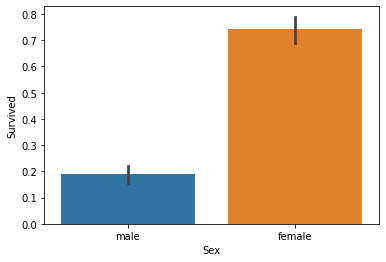

In [56]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)       # 탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많았지만, 여자는 314명 중 233명으로 약 74.2% 생존했고 남자는 577명 중 109명만 살아남아 약 18.8% 생존

- **객실 등급** : 부를 측정할 수 있는 속성
  
→ 일등실, 이등실, 삼등실에 따른 생존 확률 (성별과 함께 고려하는 것이 효율적 → **객실 등급별 성별에 따른 생존 확률**)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

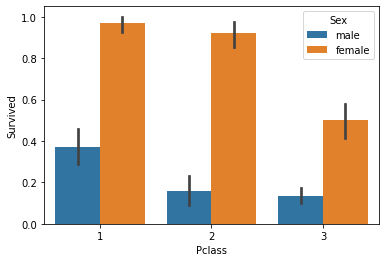

In [45]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)       # 여성의 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐
                                                                        # 남성의 경우는 일등실의 생존 확률이 이 삼등실의 생존 확률보다 월등히 높음

- **Age에 따른 생존 확률** : 범위별로 분류해 카테고리 값을 할당

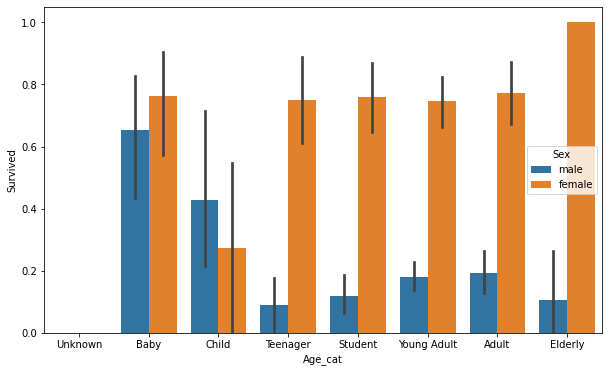

In [46]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'           # -1 이하의 오류 값 : Unknown
    elif age <= 5: cat = 'Baby'             # 0 ~ 5세 : Baby 
    elif age <= 12: cat = 'Child'           # 6 ~ 12세 : Child
    elif age <= 18: cat = 'Teenager'        # 13 ~ 18세 : Teenager
    elif age <= 25: cat = 'Student'         # 19 ~ 25세 : Student
    elif age <= 35: cat = 'Young Adult'     # 26 ~ 35세 : Young Adult
    elif age <= 60: cat = 'Adult'           # 36 ~ 60세 : Adult
    else : cat = 'Elderly'                  # 61세 이상 : Elderly
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)                     # 여자 Baby의 경우 비교적 생존 확률이 높았지만 여자 Child는 다른 연령대에 비해 생존 확률이 낮으며 여자 Elderly의 경우는 매우 생존 확률이 높음
titanic_df.drop('Age_cat', axis=1, inplace=True)                                                            # Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피치임을 확인 가능

- 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환  
→ **LabelEncoder** 클래스를 이용해 레이블 인코딩 적용  
(LabelEncoder 객체 : 카테고리 값의 유형 수에 따라 **0 ~ (카테고리 유형 수 - 1)까지의 숫자 값으로 변환**)

In [47]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:                                # Sex, Cabin, Embarked 속성이 숫자형으로 바뀜
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [48]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)            # 머신러닝 알고리즘에 불필요한, 단순한 식별자 수준의 피처인 PassengerId, Name, Ticket 피처 제거 
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출 → 원본 데이터 가공
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [50]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출
titanic_df = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/titanic_train.csv')
y_titanic_df = titanic_df['Survived']                                               # 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만듦
X_titanic_df= titanic_df.drop('Survived',axis=1)                                    # Survived 속성을 드롭해 피처 데이터 세트 만듦

X_titanic_df = transform_features(X_titanic_df)                                     # 생성된 피처 데이터 세트에 transform_features() 적용해 데이터 가공

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,               # 내려받은 학습 데이터 세트를 기반으로 해서 train_test_split() API를 이용해 별도의 테스트 데이터 세트 추출
                                                  test_size=0.2, random_state=11)           # 테스트 데이터 세트 크기 = 전체의 20%

- ML 알고리즘인 **결정 트리**, **랜덤 포레스트**, **로지스틱 회귀**(이름은 회귀이지만 매우 강력한 분류 알고리즘)를 이용해 **타이타닉 생존자를 예측**
  
- 사이킷런 클래스를 이용해 train_test split()으로 **분리한 학습 데이터와 테스트 데이터를 기반으로** 머신러닝 모델을 **학습**하고(fit), **예측**(predict)할 것
- 예측 성능 평가는 **정확도**로 할 것이며 이를 위해 accuracy_score() API를 사용
- LogisticRegression의 생성 인자로 입력된 **solver='liblinear'** : 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정하는 것

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)                                            # 결정트리
rf_clf = RandomForestClassifier(random_state=11)                                            # 랜덤 포레스트
lr_clf = LogisticRegression(solver='liblinear')                                             # 로지스틱 회귀

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


- 3개의 알고리즘 중 **LogisticRegression**이 타 알고리즘에 비해 **높은 정확도** 가짐

- **교차 검증으로 결정 트리 모델 평가**  
: 교차 검증을 위한 사이킷런 model_selection 패키지의 **KFold** 클래스, **cross_val_score()**, **GridSearchCV** 클래스를 모두 사용

### KFold 클래스 이용한 교차 검증

In [53]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))                                            # KFold 평균 정확도 = 약 78.23%
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


### cross_val_score() 이용한 교차 검증

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))                       # cross_val_score 평균 정확도 = 약 78.79% → cross_val_score()와 KFold의 평균 정확도가 다른 이유 : cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


### GridSearchCV 클래스 이용한 교차 검증

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)        # CV는 5개의 폴드 세트 지정, 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능 측정
grid_dclf.fit(X_train , y_train)                                                            

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)                         # 최적화된 하이퍼 파라미터인 max_depth=3, min_samples_leaf=5, min_samples_split=2
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))                    # 최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도 출력
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))         # 최적화된 하이퍼 파라미터로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도 약 87.15%로 향상됨

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


- 하이퍼 파라미터 변경 전보다 약 8% 이상이 증가했는데, 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 어려움  
(테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것으로 보임)